<a href="https://colab.research.google.com/github/macorony/NeuralNetwork/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Basic

In [2]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)

r2 = torch.rand(2,2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [5]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3) +2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([[4., 4., 4.],
        [4., 4., 4.]])
torch.Size([2, 3])


In [6]:
r = torch.rand(2,2) - 0.5 * 2
print("A random matrix, r: {}".format(r))
print("\nAbsolute value of r: {}".format(torch.abs(r)))
print("\nInverse sine of r: {}".format(torch.abs(r)))
print("\nDetermined of r: {}".format(torch.det(r)))
print("\nSingular Value decomposition of r: {}".format(torch.svd(r)))
print("\nAverage and standard deviation of r: {}".format(torch.std_mean(r)))
print("\nMaximum value of r: {}".format(torch.max(r)))

A random matrix, r: tensor([[-0.5784, -0.9309],
        [-0.7668, -0.5953]])

Absolute value of r: tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Inverse sine of r: tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Determined of r: -0.36948588490486145

Singular Value decomposition of r: torch.return_types.svd(
U=tensor([[-0.7512, -0.6601],
        [-0.6601,  0.7512]]),
S=tensor([1.4415, 0.2563]),
V=tensor([[ 0.6525, -0.7578],
        [ 0.7578,  0.6525]]))

Average and standard deviation of r: (tensor(0.1656), tensor(-0.7179))

Maximum value of r: -0.5783984065055847


# Autograd

In [7]:
x = torch.randn(1,10)
prev_h =torch.randn(1,20)
W_h = torch.randn(20,20)
W_x = torch.randn(20,10)

In [8]:
i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()

In [9]:
loss = next_h.sum()

# A pytorch model

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # y = wx + b
    self.fc1 = nn.Linear(16*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 =nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features




In [12]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [13]:
input = torch.rand(1,1,32,32)
print(input.shape)

torch.Size([1, 1, 32, 32])


In [14]:
output = net(input)
print(output)

tensor([[-0.0721, -0.0591,  0.0887, -0.0504, -0.0573,  0.0829, -0.0339, -0.0914,
          0.1082, -0.0013]], grad_fn=<AddmmBackward0>)


In [15]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)

In [16]:
output

tensor([[ 0.5816,  0.6268, -0.6016,  ..., -0.4007,  0.4633,  0.1672],
        [-0.6382,  0.5278, -1.4308,  ..., -0.5047, -0.0698,  0.0934],
        [-0.0045, -0.4488, -0.3339,  ..., -0.6418, -0.6971, -0.3431],
        ...,
        [-0.3212, -1.0729, -0.6405,  ...,  0.0686, -0.0320, -1.3854],
        [-0.1396, -0.2422,  0.4459,  ...,  0.2898,  0.0753, -0.2173],
        [-0.2004,  0.0419,  0.3773,  ..., -0.0946,  0.3696,  0.4180]],
       grad_fn=<AddmmBackward0>)

In [17]:
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16,20)
output = m(input)

In [18]:
output.shape

torch.Size([20, 7, 9])

# About pooling
1. The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarizing the features lying within the region by the filter.
2. A CNN model architecture is to have a number of convolution and pooling layers stacked one after the other
3. Pooling layer are used to reduce the dimensions of the feature maps. Thus, it reduce the numbers of parameters to learn and the amount of computation in the network.
4. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operation are performed on summarised features instead of precisely positioned features generated by the convolution layer.

## Types of pooling layer
1. Max pooling, a pooling operation to select the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous map.
2. Average pooling computes the average of the elements present in the region of feature map covered by the filter.
3. Global pooling ?



In [19]:
# Max pooling
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D, AveragePooling2D

image = np.array([
                  [2, 3, 4, 5],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]
                  ])
image = image.reshape(1, 4, 4, 1)

model_max = Sequential([MaxPooling2D(pool_size=2, strides=2)])

model_average = Sequential([AveragePooling2D(pool_size=2, strides=2)])

output_max = model_max.predict(image)

output_average = model_average.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [20]:
print("The max-pooling output is {}".format(np.squeeze(output_average)))
print("\nThe average-pooling output is {}".format(np.squeeze(output_average)))


The max-pooling output is [[4.5  4.  ]
 [4.25 3.5 ]]

The average-pooling output is [[4.5  4.  ]
 [4.25 3.5 ]]


# torch.nn.Module
Base class for all neural network module, self-defined models should subclass this class

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.conv2 = nn.Conv2d(20, 20, 5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    return F.relu(self.conv2(x))

# What is convolution
Convolution is a mathematical operation that combines two functions to describe the overlap between them. Convolution takes two functions and slides one of them over the other, multiplying the function values at each point where they overlap, and adding up the products to create a new function.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])

kernel_horizontal = np.array([np.array([2,2]), np.array([-2,-2])])
kernel_vertical = np.array([np.array([2,-2]), np.array([2,-2])])

In [25]:
def apply_kernel(img, kernel):
  return np.sum(np.multiply(img1, kernel))


[[200 200]
 [200 200]]


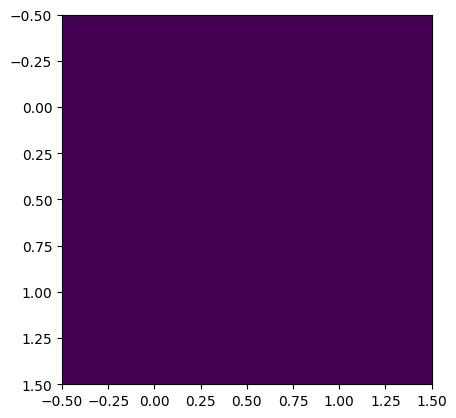

[[200 200]
 [  0   0]]


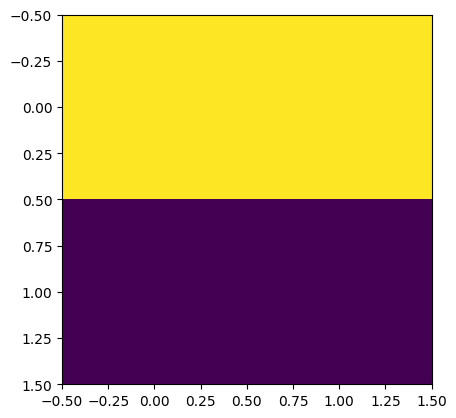

[[200   0]
 [200   0]]


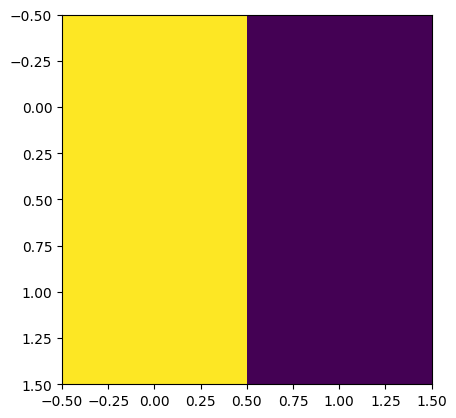

In [26]:
for img in [img1, img2, img3]:
  print(img)
  plt.imshow(img)
  plt.show()

In [27]:
for img in [img1, img2, img3]:
  print(img)
  for kernel in [kernel_horizontal, kernel_horizontal]:
    print(kernel)
    out = apply_kernel(img, kernel)
    print(out)


[[200 200]
 [200 200]]
[[ 2  2]
 [-2 -2]]
0
[[ 2  2]
 [-2 -2]]
0
[[200 200]
 [  0   0]]
[[ 2  2]
 [-2 -2]]
0
[[ 2  2]
 [-2 -2]]
0
[[200   0]
 [200   0]]
[[ 2  2]
 [-2 -2]]
0
[[ 2  2]
 [-2 -2]]
0


## Convolution from scratch

In [28]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt

<ipython-input-29-209ca0f6ec47>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("/content/drive/MyDrive/file_transmission/pic.jpg")


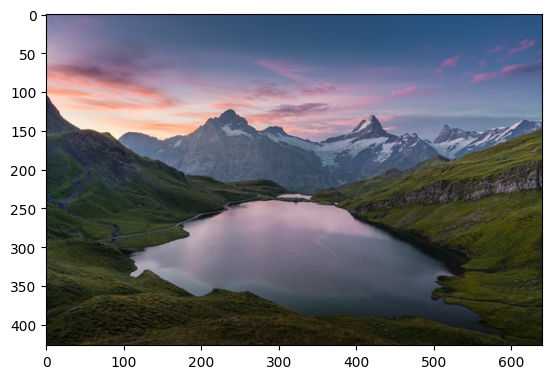

In [29]:
image = imageio.imread("/content/drive/MyDrive/file_transmission/pic.jpg")
plt.imshow(image)

In [30]:
from typing import List, Tuple, Union

In [31]:
def add_padding(matrix: np.ndarray, padding: Tuple[int, int]) -> np.ndarray:
  n, m = matrix.shape
  r, c = padding
  padded_matrix = np.zeros((n + r * 2, m + c * 2))
  padded_matrix[r: n + r, c: m +c] = matrix
  return padded_matrix

def _check_params(matrix, kernel, stride, dilation, padding):
  params_are_correct = (isinstance(stride[0], int) and isinstance(stride[1], int) and
                        isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                        isinstance(padding[0], int) and isinstance(padding[1], int) and
                        stride[0] >= 1 and stride[1] and stride[1] >= 1 and
                        dilation[0] >= 1 and dilation[1] >= 1 and
                        padding[0] >= 0 and padding[1] >=0)
  assert params_are_correct
  if not isinstance(matrix, np.ndarray):
    matrix = np.array(matrix)
  n, m = matrix.shape
  matrix = matrix if list(padding) == [0,0] else add_padding(matrix, padding)
  n_p, m_p = matrix.shape

  if not isinstance(kernel, np.array):
    kernel = np.array(kernel)
  k = kernel.shape

  kernel_is_correct = k[0] % 2 == 1 and k[1] %2 == 1
  assert kernel_is_correct
  matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
  assert matrix_to_kernel_is_correct

  h_out = np.floor((n+2*padding[0] - k[0] - (k[0] - 1) * (dilation[0] - 1)) / stride[0]).astype(int) + 1
  w_out = np.floor((m+2*padding[1] - k[1] - (k[1] - 1) * (dilation[1] - 1)) / stride[1]).astype(int) + 1
  out_dimensions_are_correct = h_out > 0 and w_out > 0
  assert out_dimensions_are_correct

  return matrix, kernel, k, h_out, w_out

def conv2d(matrix: Union[List[List(float)], np.ndarray],
           kernel: Union[List[List(float)], np.ndarray],
           stride: Tuple[int, int] = (1,1),
           dilation: Tuple[int, int] = (1,1),
           padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
  matrix, kernel, k, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
  matrix_out = np.zeros((h_out, w_out))

  b = k[0] // 2, k[0] // 2
  center_x_0 = b[0] * dilation[0]
  center_y_0 = b[1] * dilation[1]
  for i in range(h_out):














2

In [ ]:
list((1,1))

[1, 1]

In [39]:
matrix = np.random.rand(2,2)
kernel = np.random.rand(2,2)

In [40]:
np.multiply(matrix, kernel)

array([[0.06778349, 0.56806095],
       [0.13054797, 0.13718634]])

In [ ]:
add_padding(matrix, (1,1))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.18914316, 0.43202181, 0.9170338 , 0.08147488,
        0.        ],
       [0.        , 0.57100995, 0.23485021, 0.23082325, 0.15396238,
        0.        ],
       [0.        , 0.94317857, 0.0687822 , 0.9331148 , 0.3249481 ,
        0.        ],
       [0.        , 0.71678626, 0.50175706, 0.08077688, 0.27849234,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
numbers: List[int] = [1,2,3,4,5]

In [ ]:
num: int = 5
isinstance(num, int)

True

In [ ]:
def add(x: int, y: int) -> int:

  return x+y

In [ ]:
add(5, 3.4)

8.4